In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

from sklearn import linear_model

# import requests, zipfile
from io import StringIO
import io

In [12]:
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# r = requests.get(url, stream=True)

# z = zipfile.ZipFile(io.BytesIO(r.content))
# z.extractall()

NameError: name 'requests' is not defined

In [5]:
cd ..

C:\GitHub\DataScientistEducation


In [37]:
DATA_PATH = './03/chap3/'
FILE_NAME = 'student-mat.csv'

student_read_math = pd.read_csv(DATA_PATH + FILE_NAME, sep = ';')

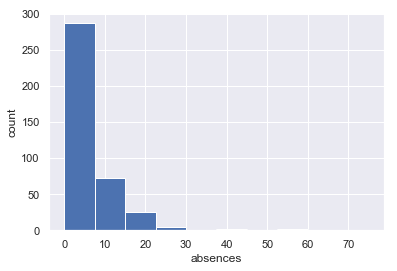

In [7]:
# histgram、データの指定
plt.hist(student_read_math['absences'])

# x軸とy軸のそれぞれのラベル
plt.xlabel('absences')
plt.ylabel('count')

# グリッドを付ける
plt.grid(True)

In [8]:
# 平均値
print(student_read_math['absences'].mean())
# 中央値
print(student_read_math['absences'].median())
# 最頻値
print(student_read_math['absences'].mode())

5.708860759493671
4.0
0    0
dtype: int64


In [9]:
# 分散
student_read_math['absences'].var()

64.04954057700957

In [10]:
# 標準偏差
student_read_math['absences'].std()

8.00309568710818

In [11]:
# 要約統計量
student_read_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [12]:
# 四分位範囲（75％タイル-25％タイル）
student_read_math['absences'].describe()[6] - student_read_math['absences'].describe()[4]

8.0

In [13]:
# 全列に対しての要約統計量
student_read_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


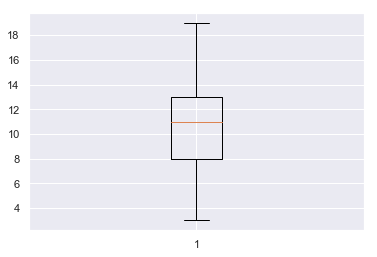

In [14]:
# 箱ひげ図：G1
plt.boxplot(student_read_math['G1'])
plt.grid(True)

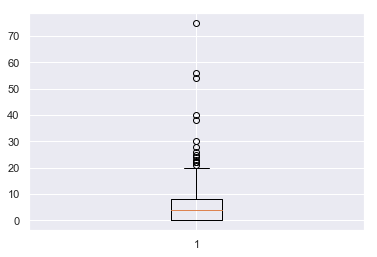

In [15]:
# 箱ひげ図：欠席数
plt.boxplot(student_read_math['absences'])
plt.grid(True)

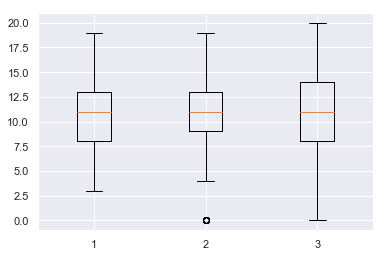

In [16]:
# 箱ひげ図：複数項目の表示
plt.boxplot([student_read_math['G1'], student_read_math['G2'], student_read_math['G3']])
plt.grid(True)

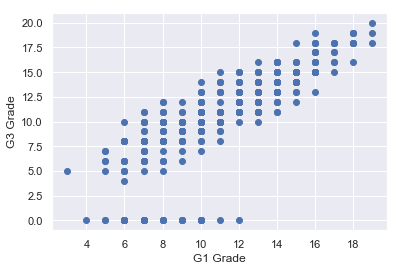

In [17]:
# 散布図
plt.plot(student_read_math['G1'], student_read_math['G3'], 'o')

# ラベル
plt.ylabel('G3 Grade')
plt.xlabel('G1 Grade')
plt.grid(True)

In [18]:
# 共分散
np.cov(student_read_math['G1'], student_read_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [19]:
# 分散の確認
print('G1の分散：', student_read_math['G1'].var())
print('G3の分散：', student_read_math['G3'].var())

G1の分散： 11.017053267364904
G3の分散： 20.989616397866733


In [20]:
# 相関関係の算出
# 1つ目の戻り値が相関係数
# 2つ目の戻り値がP値
sp.stats.pearsonr(student_read_math['G1'], student_read_math['G3'])

(0.8014679320174141, 9.001430312276602e-90)

In [21]:
# 相関行列
np.corrcoef(student_read_math['G1'], student_read_math['G3'])

array([[1.   , 0.801],
       [0.801, 1.   ]])

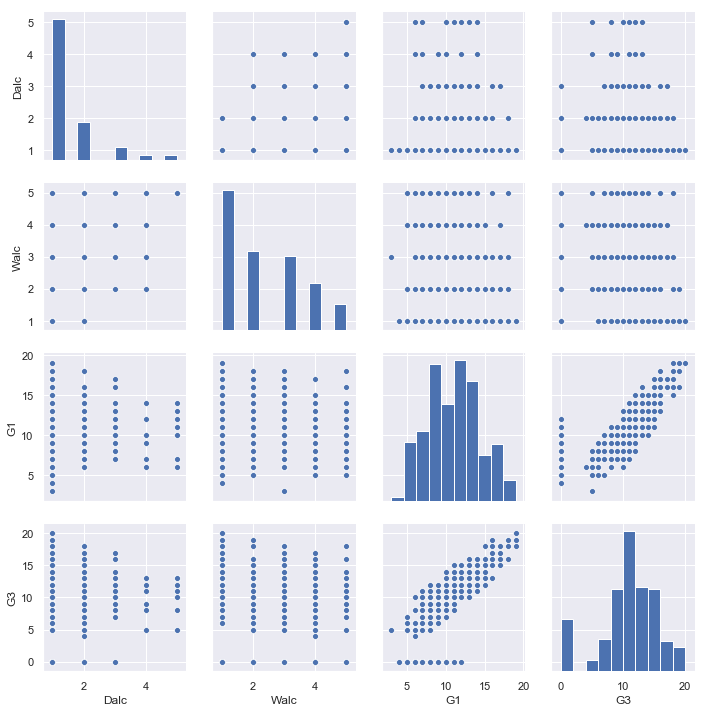

In [22]:
# すべての変数のヒストグラムや散布図を描く
sns.pairplot(student_read_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [25]:
# 例：週末にアルコールを飲む人の１期目の成績の平均値
student_read_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

In [36]:
#Practice 3-1
student_read_por = pd.read_csv(DATA_PATH + 'student-por.csv', sep = ';')
student_read_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [41]:
#Practice 3-2
key_li = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', \
          'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']

calc_math = student_read_math.copy()
calc_por = student_read_por.copy()

for col_name in list(student_read_por.columns.values):

    if col_name in key_li:
        continue;
    else:
        calc_math = calc_math.rename(columns={col_name:col_name+"_math"})
        calc_por = calc_por.rename(columns={col_name:col_name+"_por"})
        
ret_df = pd.merge(calc_math, calc_por, on=key_li, how='inner')

In [42]:
ret_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,382.0,16.586387,1.173470,15.0,16.00,17.0,17.0,22.0
Medu,382.0,2.806283,1.086381,0.0,2.00,3.0,4.0,4.0
Fedu,382.0,2.565445,1.096240,0.0,2.00,3.0,4.0,4.0
traveltime_math,382.0,1.442408,0.695378,1.0,1.00,1.0,2.0,4.0
studytime_math,382.0,2.034031,0.845798,1.0,1.00,2.0,2.0,4.0
failures_math,382.0,0.290576,0.729481,0.0,0.00,0.0,0.0,3.0
famrel_math,382.0,3.939791,0.921620,1.0,4.00,4.0,5.0,5.0
freetime_math,382.0,3.222513,0.988233,1.0,3.00,3.0,4.0,5.0
goout_math,382.0,3.112565,1.131927,1.0,2.00,3.0,4.0,5.0
Dalc_math,382.0,1.473822,0.886229,1.0,1.00,1.0,2.0,5.0


In [1]:
#Practice 3-3
plt.scatter(ret_df['Medu'], ret_df['G3_math'])

NameError: name 'plt' is not defined

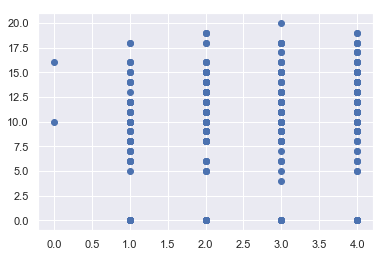

In [45]:
plt.scatter(ret_df['Fedu'], ret_df['G3_math'])

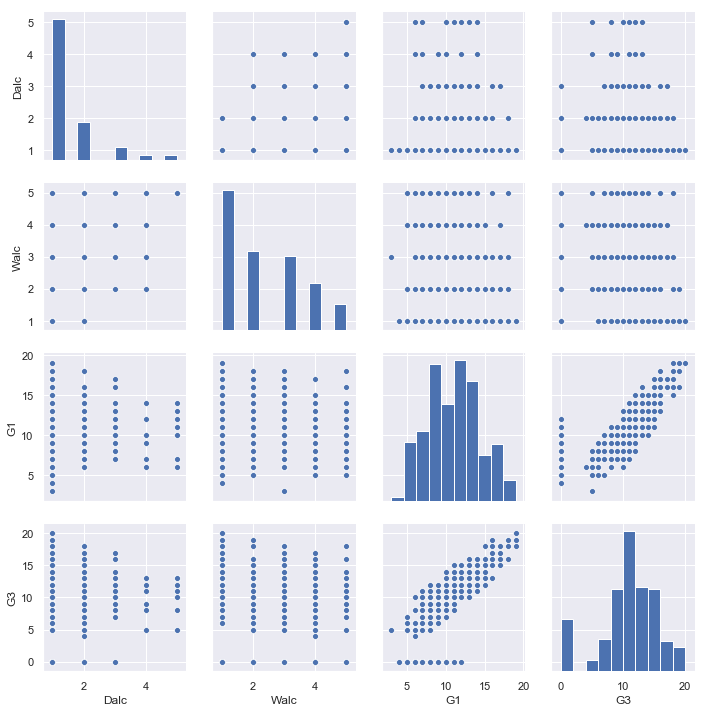

In [46]:
# すべての変数のヒストグラムや散布図を描く
sns.pairplot(student_read_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

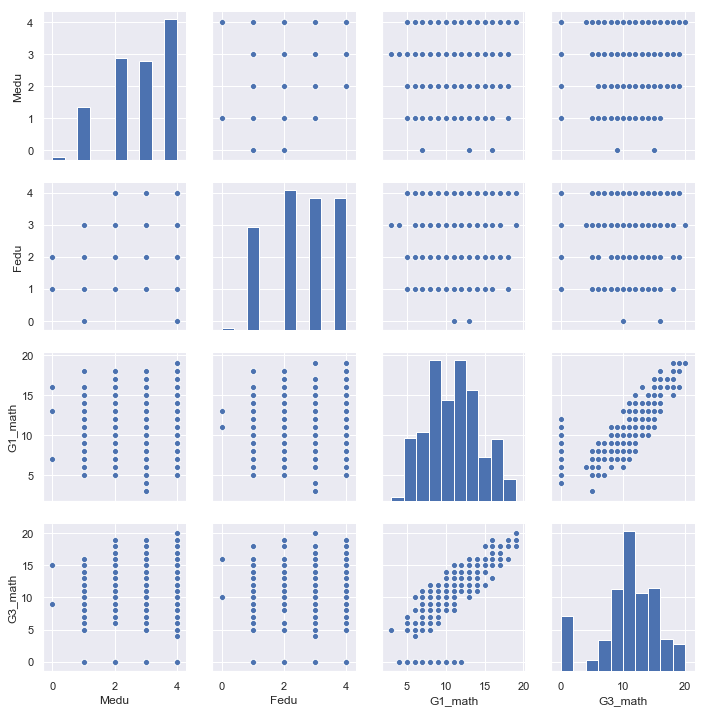

In [48]:
# すべての変数のヒストグラムや散布図を描く
sns.pairplot(ret_df[['Medu', 'Fedu', 'G1_math', 'G3_math']])
plt.grid(True)